In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, multivariate_normal, poisson

In [2]:
plt.style.use("ggplot")

### **Bayesian Statistics**

In [3]:
# Ejercicio 2

In [4]:
# X|w1 ~ Laplace(a1, b1)
a1, b1 = 0, 1
p_Xw1 = lambda x: np.exp(- np.abs(x - a1) / b1) / (2 * b1)

# X|w2 ~ Laplace(a2, b2)
a2, b2 = 1, 2
p_Xw2 = lambda x: np.exp(- np.abs(x - a2) / b2) / (2 * b2)

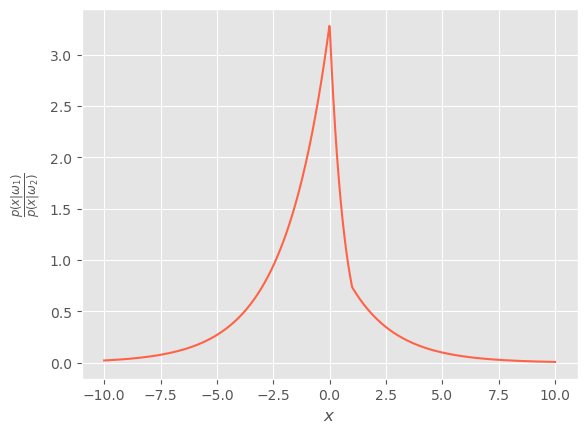

In [5]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, p_Xw1(x)/p_Xw2(x), color="tomato")
plt.xlabel(r"$x$")
plt.ylabel(r"$\frac{p(x|\omega_1)}{p(x|\omega_2)}$")
plt.show()

In [6]:
# Ejercicio 3

In [7]:
# Probabilidades a Priori
P_w1 = 0.4
P_w2 = 1 - P_w1

# X|w1 ~ N(mu1, sigma1)
mu1, sigma1 = 3, np.sqrt(3)

# X|w2 ~ N(mu2, sigma2)
mu2, sigma2 = 1, 2

# theta (threshold)
theta = 2

In [8]:
# Error Promedio
P_error = P_w1 * norm.cdf(theta, mu1, sigma1) + P_w2 * norm.sf(theta, mu2, sigma2)
print(f"P(error) = {P_error:.4f}")

P(error) = 0.2979


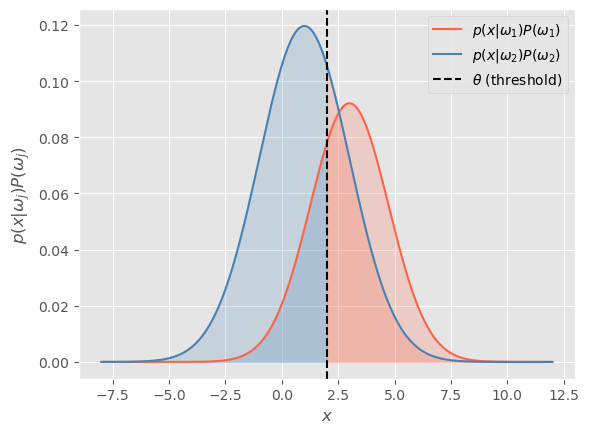

In [9]:
x = np.linspace(theta - 10, theta + 10, 1000)

p_Xw1 = norm.pdf(x, mu1, sigma1)
p_Xw2 = norm.pdf(x, mu2, sigma2)

plt.plot(x, p_Xw1 * P_w1, color="tomato", label=r"$p(x|\omega_1) P(\omega_1)$")
plt.plot(x, p_Xw2 * P_w2, color="steelblue", label=r"$p(x|\omega_2) P(\omega_2)$")

plt.axvline(theta, color="black", linestyle="--", label=r"$\theta$ (threshold)")

plt.fill_between(x, p_Xw1 * P_w1, where=(x > theta), color="tomato", alpha=0.2)
plt.fill_between(x, p_Xw2 * P_w2, where=(x > theta), color="tomato", alpha=0.2)

plt.fill_between(x, p_Xw1 * P_w1, where=(x <= theta), color="steelblue", alpha=0.2)
plt.fill_between(x, p_Xw2 * P_w2, where=(x <= theta), color="steelblue", alpha=0.2)

plt.xlabel(r"$x$")
plt.ylabel(r"$p(x|\omega_j) P(\omega_j)$")

plt.legend(loc="upper right")

plt.show()

In [10]:
# Ejercicio 6

In [11]:
# Probabilidades a Priori
P_w1 = 0.5
P_w2 = 1 - P_w1

# X|w1 ~ N(mu1, sigma1)
mu1, sigma1 = 1, 1

# X|w2 ~ N(mu2, sigma2)
mu2, sigma2 = -1, 1

# lambda_r / lambda_s
rs = 0.25

# Funciones Discriminantes
g1 = lambda x: norm.pdf(x, mu1, sigma1) * P_w1
g2 = lambda x: norm.pdf(x, mu2, sigma2) * P_w2
gr = lambda x: (1 - rs) * (g1(x) + g2(x))

In [12]:
x = np.linspace(-5, 5, 500)

g1x = g1(x)
g2x = g2(x)
grx = gr(x)

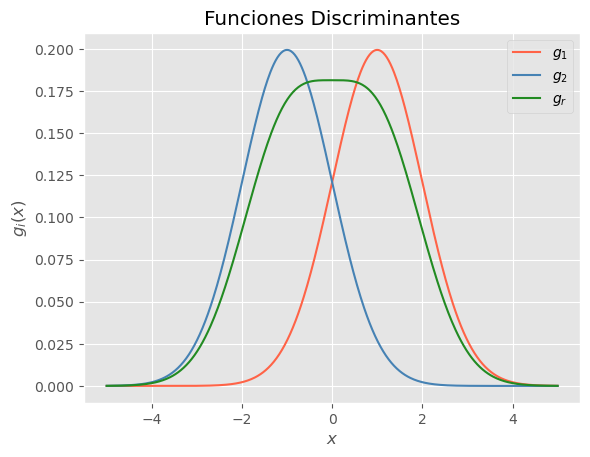

In [13]:
plt.plot(x, g1x, color="tomato", label=r"$g_1$")
plt.plot(x, g2x, color="steelblue", label=r"$g_2$")
plt.plot(x, grx, color="forestgreen", label=r"$g_r$")

plt.title("Funciones Discriminantes")
plt.xlabel(r"$x$")
plt.ylabel(r"$g_i(x)$")

plt.legend(loc="upper right")

plt.show()

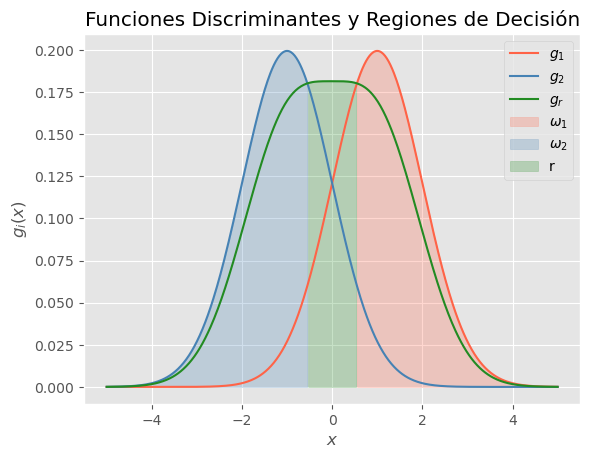

In [14]:
plt.plot(x, g1x, color="tomato", label=r"$g_1$")
plt.plot(x, g2x, color="steelblue", label=r"$g_2$")
plt.plot(x, grx, color="forestgreen", label=r"$g_r$")

plt.fill_between(x, 0, g1x, where=(g1x >= g2x) & (g1x >= grx), color="tomato", alpha=0.25, label=r"$\omega_1$")
plt.fill_between(x, 0, g2x, where=(g2x >= g1x) & (g2x >= grx), color="steelblue", alpha=0.25, label=r"$\omega_2$")
plt.fill_between(x, 0, grx, where=(grx >= g1x) & (grx >= g2x), color="forestgreen", alpha=0.25, label="r")

plt.title("Funciones Discriminantes y Regiones de Decisión")
plt.xlabel(r"$x$")
plt.ylabel(r"$g_i(x)$")

plt.legend(loc="upper right")

plt.show()

In [15]:
# Ejercicio 7

In [16]:
# Probabilidades a Priori
P_w1 = 0.5
P_w2 = 1 - P_w1

# X|w1 ~ N(mu1, S), X|w2 ~ N(mu2, S)

mu1 = np.array([0, 0])
mu2 = np.array([1, 1])

C = np.array([[0, -0.23], [0.83, 0.23]])
S = C.T @ C

In [17]:
np.random.seed(42)

n = 500

n1 = int(P_w1 * n)
n2 = n - n1

Xw1 = multivariate_normal.rvs(mu1, S, n1)
Xw2 = multivariate_normal.rvs(mu2, S, n2)

y_w1 = 1 * np.ones(n1)
y_w2 = 2 * np.ones(n2)

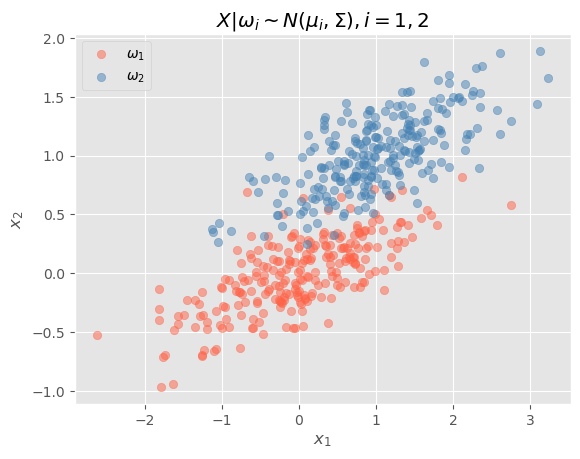

In [18]:
plt.scatter(Xw1[:, 0], Xw1[:, 1], color="tomato", alpha=0.5, label=r"$\omega_1$")
plt.scatter(Xw2[:, 0], Xw2[:, 1], color="steelblue", alpha=0.5, label=r"$\omega_2$")

plt.title(r"$X|\omega_i \sim N(\mu_i, \Sigma), i = 1, 2$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.legend()

plt.show()

In [19]:
X = np.vstack((Xw1, Xw2))
y = np.hstack((y_w1, y_w2))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [21]:
P_w1_train = sum(y_train == 1) / len(y_train)
P_w2_train = sum(y_train == 2) / len(y_train)

Xw1_train = X_train[y_train == 1]
Xw2_train = X_train[y_train == 2]

mu1_train = np.mean(Xw1_train, axis=0)
mu2_train = np.mean(Xw2_train, axis=0)

S1_train = np.cov(Xw1_train, rowvar=False)
S2_train = np.cov(Xw2_train, rowvar=False)

In [22]:
def g1(x):

    S1_train_inv = np.linalg.inv(S1_train)
    S1_train_det = np.linalg.det(S1_train)

    W1 = - S1_train_inv / 2
    w1 = S1_train_inv @ mu1_train
    b1 = - (mu1_train.T @ S1_train_inv @ mu1_train + np.log(S1_train_det)) / 2 + np.log(P_w1_train)

    return x.T @ W1 @ x + w1.T @ x + b1

def g2(x):

    S2_train_inv = np.linalg.inv(S2_train)
    S2_train_det = np.linalg.det(S2_train)

    W2 = - S2_train_inv / 2
    w2 = S2_train_inv @ mu2_train
    b2 = - (mu2_train.T @ S2_train_inv @ mu2_train + np.log(S2_train_det)) / 2 + np.log(P_w2_train)

    return x.T @ W2 @ x + w2.T @ x + b2

def classifier(x):
    if g1(x) > g2(x):
        return 1
    else:
        return 2

In [23]:
# Train Error

n_train = X_train.shape[0]

y_pred = np.zeros_like(y_train)
for i in range(n_train):
    y_pred[i] = classifier(X_train[i])

train_error = sum(y_pred != y_train) / n_train
print(f"Train Error: {train_error:.2f}")

Train Error: 0.06


In [24]:
# Test Error

n_test = X_test.shape[0]

y_pred = np.zeros_like(y_test)
for i in range(n_test):
    y_pred[i] = classifier(X_test[i])

test_error = sum(y_pred != y_test) / n_test
print(f"Test Error: {test_error:.2f}")

Test Error: 0.01


In [25]:
# Ejercicio 8

In [26]:
# X|w1 ~ Poisson(lambda1)
lambda1 = 1.8

# X|w2 ~ Poisson(lambda2)
lambda2 = 0.4

# T = (lambda1 - lambda2) / (log(lambda1) - log(lambda2))
T = (lambda1 - lambda2) / (np.log(lambda1) - np.log(lambda2))

# Función Discriminante
g = lambda x: x - T

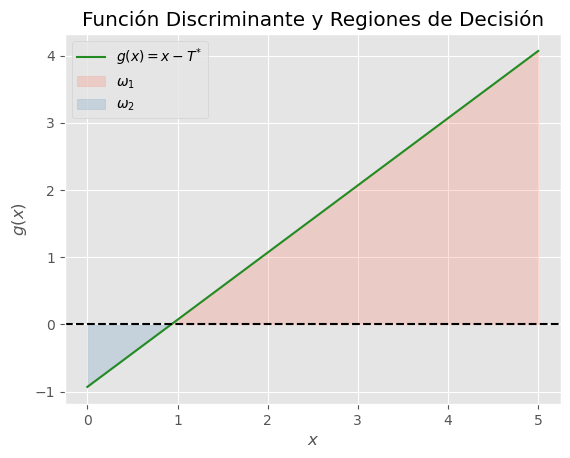

In [27]:
x = np.linspace(0, 5, 1000)
gx = g(x)

plt.plot(x, gx, color="forestgreen", label=r"$g(x) = x - T^{*}$")

plt.axhline(0, color="black", linestyle="--")

plt.fill_between(x, gx, where=(gx >= 0), color="tomato", alpha=0.2, label=r"$\omega_1$")
plt.fill_between(x, gx, where=(gx <= 0), color="steelblue", alpha=0.2, label=r"$\omega_2$")

plt.title("Función Discriminante y Regiones de Decisión")
plt.xlabel(r"$x$")
plt.ylabel(r"$g(x)$")

plt.legend()

plt.show()

In [28]:
# Error Promedio
P_error = (1/2) * (poisson.cdf(np.ceil(T) - 1, lambda1) + poisson.sf(np.ceil(T) - 1, lambda2))
print(f"P(error) = {P_error:.4f}")

P(error) = 0.2475


In [29]:
np.random.seed(42)

# Error Promedio (Simulación)

n = 100

n1 = int(0.5 * n)
n2 = n - n1

P_error_sim = 0

Nsim = 10000
for _ in range(Nsim):

    error = 0
    for x in poisson.rvs(lambda1, size=n1):
        if (g(x) < 0):
            error += 1
    for x in poisson.rvs(lambda2, size=n2):
        if (g(x) > 0):
            error += 1  

    P_error_sim += (error / n) / Nsim

print(f"P(error)_sim = {P_error_sim:.4f}")

P(error)_sim = 0.2471
